Time Series Momentum

In [7]:
import pandas as pd
import numpy as np 
import pickle 


import multi_factor_util
from multi_factor_util import get_performance_metrics, get_data_from_dict

**Data Extraction**

In [17]:
file_name = "multifactor_data_2017_2022.bz2"
with open (file_name ,"rb")as file:
    data = pickle.load(file)
    

In [18]:
close_price = get_data_from_dict(data, 'Close')
close_price.head()

,AAPL,ABBV,ACN,ADBE,AIG,AMGN,AMT,AMZN,ELV,AON,...,UNP,UPS,USB,RTX,V,VRTX,VZ,WBA,WFC,XOM
2017-10-02,36.327709,69.086456,123.357384,147.940002,52.756409,157.477875,119.987679,47.959499,178.421280,139.316406,...,101.742920,101.005196,43.475266,64.492149,101.456879,152.229996,36.936378,61.800434,46.647301,61.183491
2017-10-03,36.485950,68.559082,122.273506,148.600006,52.560257,157.528351,120.694221,47.855000,180.400482,139.335342,...,101.416298,100.102089,43.499680,64.563438,101.601212,152.509995,37.303047,61.953705,46.739811,61.280930
2017-10-04,36.249767,68.711945,123.102348,147.949997,52.517624,158.672592,122.619507,48.272499,180.577911,138.711075,...,100.427666,99.508377,43.239349,64.519562,101.331818,152.509995,37.340469,61.179173,46.218430,61.303410
2017-10-05,36.700871,68.925949,124.067749,150.250000,52.858742,157.208633,122.981590,49.042500,180.111099,138.701599,...,100.648315,98.839409,43.735603,64.815758,102.226646,152.300003,37.243191,62.082794,46.580021,61.475811
2017-10-06,36.679630,69.162910,124.095093,151.119995,53.097553,156.342072,122.857933,49.479000,180.391205,138.890808,...,100.586555,98.421326,44.077282,64.848686,102.698158,155.100006,36.962997,59.057301,46.739811,61.243454


Calculation of the Return 

In [21]:
rolling_returns = close_price.pct_change(252)
rolling_returns.dropna(inplace=True)
rolling_returns.head()

,AAPL,ABBV,ACN,ADBE,AIG,AMGN,AMT,AMZN,ELV,AON,...,UNP,UPS,USB,RTX,V,VRTX,VZ,WBA,WFC,XOM
2018-10-02,0.513209,0.079147,0.302198,0.838583,-0.121256,0.141963,0.083719,1.055182,0.462743,0.075165,...,0.445948,-0.000748,0.011443,0.230342,0.428905,0.260790,0.155893,-0.017212,-0.033816,0.102101
2018-10-03,0.524980,0.107990,0.321253,0.820390,-0.115486,0.137364,0.075730,1.040288,0.447323,0.079422,...,0.449805,0.015076,0.024101,0.225247,0.424015,0.260311,0.141797,-0.015508,-0.026109,0.096403
2018-10-04,0.507931,0.080538,0.295174,0.782426,-0.104299,0.110443,0.062739,0.977751,0.439358,0.087943,...,0.476468,0.017058,0.035087,0.220603,0.402852,0.236771,0.155991,-0.009258,0.000964,0.088749
2018-10-05,0.465225,0.083381,0.280385,0.751880,-0.115032,0.123813,0.061884,0.926543,0.447970,0.074885,...,0.467229,0.023330,0.019529,0.203515,0.377307,0.234734,0.157325,-0.034728,-0.012746,0.082651
2018-10-08,0.462675,0.084589,0.270160,0.685349,-0.111616,0.138627,0.070590,0.884052,0.453423,0.078184,...,0.475212,0.041176,0.020138,0.207488,0.338256,0.194971,0.167796,0.037674,-0.007242,0.096819


In [22]:
rolling_returns.iloc[0]

AAPL    0.513209
ABBV    0.079147
ACN     0.302198
ADBE    0.838583
AIG    -0.121256
          ...   
VRTX    0.260790
VZ      0.155893
WBA    -0.017212
WFC    -0.033816
XOM     0.102101
Name: 2018-10-02 00:00:00, Length: 100, dtype: float64

Rebalance the Portfolio

In [24]:
rebalancing = pd.DataFrame (index=rolling_returns.index)
rebalancing["is_start_month"] = rebalancing.index.to_series().dt.month != rebalancing.index.to_series().shift(1).dt.month 
rebalancing.head()

,is_start_month
2018-10-02,True
2018-10-03,False
2018-10-04,False
2018-10-05,False
2018-10-08,False


In [26]:
start_month_data = rolling_returns [rolling_returns.index.isin(rebalancing[rebalancing["is_start_month"]].index)]
start_month_data.head()

,AAPL,ABBV,ACN,ADBE,AIG,AMGN,AMT,AMZN,ELV,AON,...,UNP,UPS,USB,RTX,V,VRTX,VZ,WBA,WFC,XOM
2018-10-02,0.513209,0.079147,0.302198,0.838583,-0.121256,0.141963,0.083719,1.055182,0.462743,0.075165,...,0.445948,-0.000748,0.011443,0.230342,0.428905,0.260790,0.155893,-0.017212,-0.033816,0.102101
2018-11-01,0.351669,-0.098466,0.129278,0.391660,-0.317572,0.131794,0.110117,0.509070,0.284916,0.104770,...,0.285012,-0.055599,-0.019341,0.086235,0.276357,0.228283,0.227486,0.221428,-0.020381,0.000832
2018-12-03,0.096724,0.010302,0.158697,0.421903,-0.262070,0.178854,0.160031,0.524807,0.290886,0.175482,...,0.287568,-0.010649,0.015533,0.052082,0.318217,0.311528,0.188699,0.228068,-0.006680,0.013491
2019-01-02,-0.052822,-0.041365,-0.065080,0.281500,-0.317304,0.135934,0.122845,0.316092,0.146876,0.089460,...,0.049195,-0.157533,-0.111142,-0.131987,0.173528,0.094889,0.108620,-0.040594,-0.203703,-0.132256
2019-02-01,0.009496,-0.250918,-0.019712,0.238386,-0.296200,0.035028,0.179338,0.120850,0.238264,0.193872,...,0.221352,-0.139574,-0.077687,-0.118525,0.135666,0.147720,0.055771,-0.022001,-0.227801,-0.094315


Signal Generation 

In [27]:
monthly_trading_signal = start_month_data.applymap(lambda x: 1 if x > 0.05 else 0)

In [29]:
monthly_trading_signal.fillna(0,inplace=True)
daily_trading_signals = monthly_trading_signal.reindex (rebalancing.index)
daily_trading_signals = daily_trading_signals.ffill()
daily_trading_signals.head()

,AAPL,ABBV,ACN,ADBE,AIG,AMGN,AMT,AMZN,ELV,AON,...,UNP,UPS,USB,RTX,V,VRTX,VZ,WBA,WFC,XOM
2018-10-02,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2018-10-03,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2018-10-04,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2018-10-05,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2018-10-08,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


Daily Return Calculation 

In [34]:
daily_returns = close_price.pct_change(axis=0)
portfolio_returns = daily_trading_signals.shift(1) * daily_returns 
portfolio_returns.dropna(inplace=True)
portfolio_returns['Mean_Returns'] = portfolio_returns.apply(
    lambda row: row[row != 0].mean(), axis=1)

portfolio_returns.head()

,AAPL,ABBV,ACN,ADBE,AIG,AMGN,AMT,AMZN,ELV,AON,...,UPS,USB,RTX,V,VRTX,VZ,WBA,WFC,XOM,Mean_Returns
2018-10-03,0.012168,0.018890,0.005718,-0.005478,0.0,-0.003708,-0.001527,-0.009410,0.000434,0.004096,...,0.0,0.0,-0.003040,-0.002004,0.001459,-0.002389,0.0,0.0,-0.003586,-0.000405
2018-10-04,-0.017581,-0.022602,-0.013093,-0.025138,0.0,-0.016578,0.003683,-0.022194,-0.004525,0.003378,...,-0.0,0.0,-0.004468,-0.017474,-0.018678,0.013446,-0.0,0.0,-0.006616,-0.008066
2018-10-05,-0.016229,0.005754,-0.003666,-0.001858,-0.0,0.002703,0.002146,-0.010354,0.003382,-0.012070,...,-0.0,-0.0,-0.009473,-0.009539,-0.003022,-0.001454,-0.0,-0.0,-0.002805,-0.005105
2018-10-08,-0.002318,0.004556,-0.007767,-0.032406,0.0,0.007597,0.007185,-0.013352,0.005328,0.004437,...,0.0,0.0,0.003811,-0.023872,-0.014411,0.001456,0.0,0.0,0.009257,-0.001654
2018-10-09,0.013854,-0.002531,-0.006474,-0.002081,-0.0,0.002092,0.012758,0.003165,0.006453,0.005825,...,-0.0,0.0,-0.026578,0.002960,0.001727,0.010530,-0.0,-0.0,0.004412,-0.000696


In [35]:
portfolio_returns['Mean_Returns'].to_csv('raw_returns.csv')

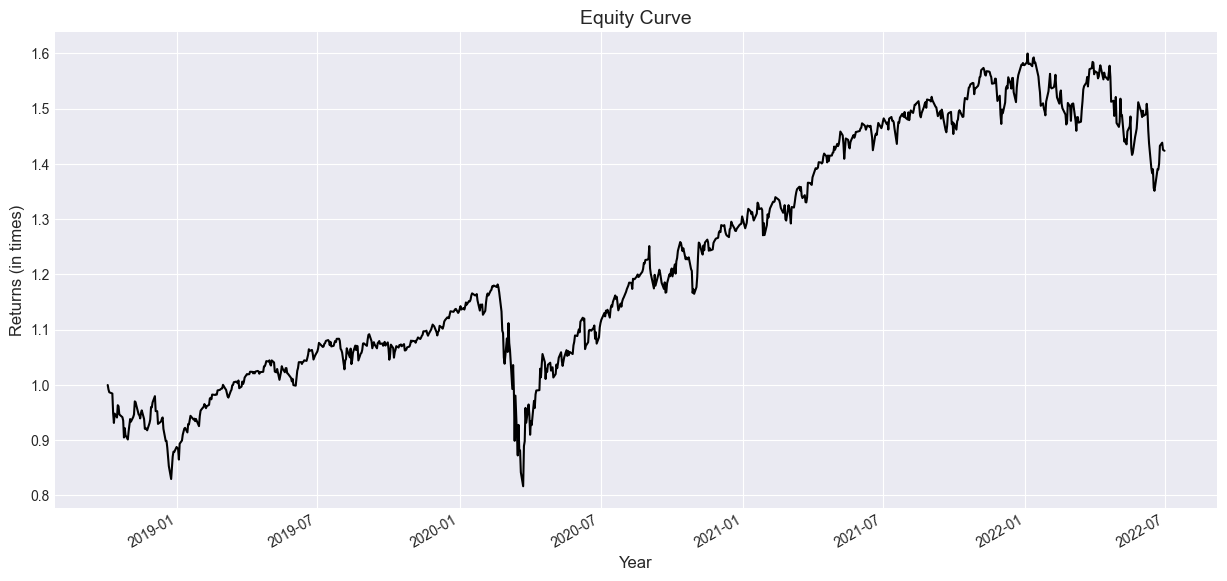

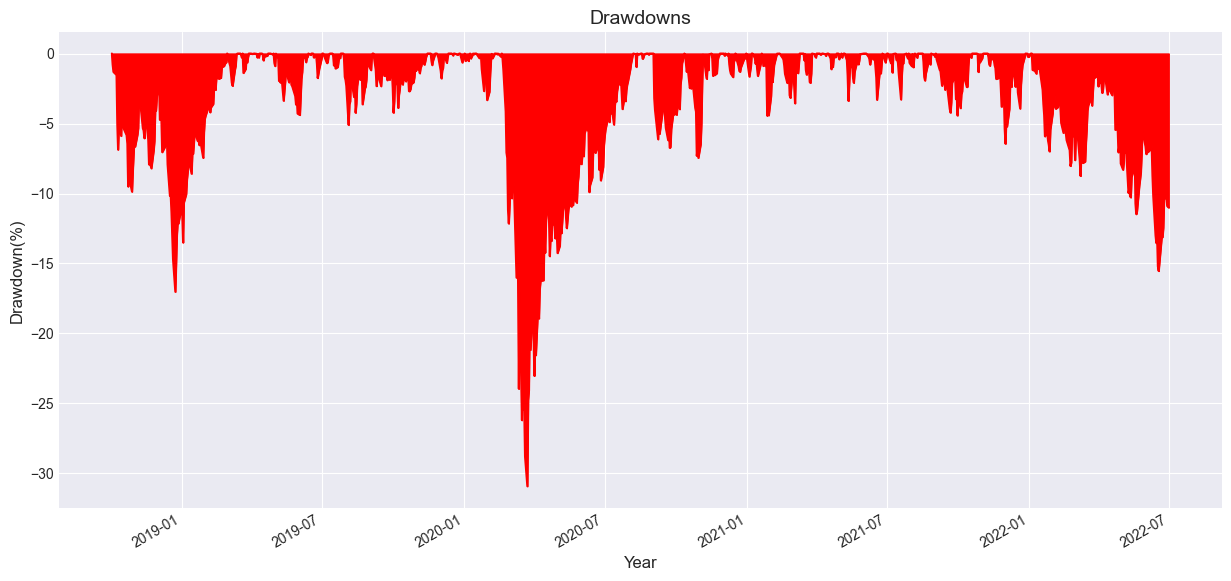

                 Strategy
CAGR                9.91%
Sharpe Ratio         0.55
Maximum Drawdown  -30.91%


,Strategy
CAGR,9.91%
Sharpe Ratio,0.55
Maximum Drawdown,-30.91%


In [36]:
get_performance_metrics(portfolio_returns)